# Atomic Clock Plotting Notebook 

Script for making atomic clock drift plots

(C) Stefan Countryman, 2018<br>
updated Yasmeen Asali, 2019

In [1]:
import numpy as np 
import h5py as hp 
import os
import matplotlib.pyplot as plt
from gwpy.time import tconvert

First, let's define the plotting script. Then we can work with the data

In [101]:
def make_plot(start, end, y_axis, location, trend='raw'):
    if trend=='raw':
        x_axis = np.arange(start, end, 0.0625) #16 data points per second
    elif trend=='m-trend':
        x_axis = np.arange(start, end, 60) #60 seconds per data point
    start_time = str(tconvert(start))
    end_time = str(tconvert(end))
    #converts y_axis time to microseconds from seconds
    MICROS_PER_SECOND = 1e6
    # find outliers
    outlierinds = np.nonzero(np.logical_or(y_axis > -1e-15, y_axis <= -1e-3))
    outliertimes = x_axis[outlierinds]
    outliers = y_axis[outlierinds]
    print("Severe outliers found and removed (time: value):")
    for i, t in enumerate(outliertimes):
        print("{}: {}".format(t, outliers[i]))
    x = np.delete(x_axis, outlierinds)
    y_ax = np.delete(y_axis, outlierinds) * MICROS_PER_SECOND
    missing = np.nonzero(y_axis == 0)
    print("Missing values found and removed at times: {}".format(x[missing]))
    x = np.delete(x, missing)
    y_ax = np.delete(y_ax, missing)
    #creates array with slope and y-intercept of line of best fit
    lobf_array = np.polyfit(x, y_ax, 1)
    #dimensionless quantity that characterizes drift
    drift_coef = lobf_array[0]/MICROS_PER_SECOND
    y_axis_lobf = np.poly1d(lobf_array)(x)
    tmp = [lobf_array[0] * i for i in x]
    tmp += lobf_array[1]
    y_dif = y_ax - tmp
    print('making plots')
    fig = plt.figure(figsize=(13,18))
    plt.suptitle('Drift of cesium clock, from ' +
                 start_time + ' until ' + end_time +
                 ' at ' + location, fontsize=20)
    plt.subplots_adjust(top=0.88888888, bottom=0.1)
    ax1 = fig.add_subplot(311)
    ax1.set_title('Line of best fit versus offset')
    ax1.plot(x, y_ax, '#ff0000')
    ax1.plot(x, y_axis_lobf, '#617d8d')
    print(type(drift_coef))
    print(str(drift_coef))
    ax1.text(0.01, 0.05, 'Drift coefficient = ' + str(drift_coef),
             transform=ax1.transAxes, bbox=dict(facecolor='#99ccff',
             boxstyle='round', alpha=0.25))
    ax1.set_xlabel('GPS time')
    ax1.set_ylabel('Offset [$\mu$s]')
    # ax3 = fig.add_subplot(313)
    # n, bins, patches = plt.hist(y_dif, 20, facecolor = '#139a0e')
    # ax3.set_xlabel('$\Delta$t [$\mu$s]')
    # ax3.set_ylabel('Frequency')
    # ax3.set_title('histogram of the residual')
    ax2 = fig.add_subplot(312)
    ax2.plot(x, y_dif)
    ax2.set_xlabel('GPS time')
    ax2.set_title('Residual of the line of best fit')
    ax2.set_ylabel('Difference [$\mu$s]')
    print('drift coefficient:')
    print(drift_coef)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1)
    plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)
    fig.savefig('cesium_clock_drift_from_' + start_time.replace(' ','_') +
                '_until_' + end_time.replace(' ','_') + '.png', dpi=300)

## With individual hdf5 files

You can download the data using the `geco_gwpy_dump.py` script. If it downloads and concatenates the files properly you do not need this script, and you can use the exectuable `atomic_clock_plot.py` script or use the code in the next section. If all the data downloads but does not concatenate, use this script. 

You should download the data on the clutser, and you can copy it to your computer using the following commands:
- On the cluster, run `tar -zcvf archive.tar.gz *.hdf5` in the directory containing the data
- Copy this file to your `public_html` then download it onto your computer (access your public_html for the Caltech cluster by using this link with your login https://ldas-jobs.ligo.caltech.edu/~albert.einstein/) 
- On your computer, unzip the file using `tar -zxvf archive.tar.gz`
- Put the data into its own directory with no other files 

In [102]:
items = os.listdir("/Users/yasmeenasali/Files/Marka_Lab/atomic_clock/scripts/data_llo/") #change this line for your system
#note: this directory must contain only the good data files 
#(aka not the first or last hdf5 files and no other files or directories)

In [103]:
#open files and pull data, append to one list
time_list = []
full_data = []
for i in items: 
    f = hp.File("data_llo/" + str(i), "r") #change this line for your system
    key = list(f.keys())[0]
    dset = f[key]
    start_time = int(str(f)[12:22])
    time_list.append(start_time)
    full_data.append(dset[()])

data_dict = {}
for i in range(len(items)):
    data_dict[time_list[i]]=full_data[i]

In [104]:
sorted_list = np.sort(time_list)

In [105]:
start_time = sorted_list[0]
end_time = sorted_list[-1] + 86400

In [106]:
full_sorted_data = []
for i in sorted_list:
    full_sorted_data.append(data_dict[i])
final_array = np.array(full_sorted_data).flatten()

Severe outliers found and removed (time: value):
1231003776.0: -1.0
1231003776.0625: -1.0
1231003776.125: -1.0
1231003776.1875: -1.0
1231003776.25: -1.0
1231003776.3125: -1.0
1231003776.375: -1.0
1231003776.4375: -1.0
1231003776.5: -1.0
1231003776.5625: -1.0
1231003776.625: -1.0
1231003776.6875: -1.0
1231003776.75: -1.0
1231003776.8125: -1.0
1231003776.875: -1.0
1231003776.9375: -1.0
1231003777.0: -1.0
1231003777.0625: -1.0
1231003777.125: -1.0
1231003777.1875: -1.0
1231003777.25: -1.0
1231003777.3125: -1.0
1231003777.375: -1.0
1231003777.4375: -1.0
1231003777.5: -1.0
1231003777.5625: -1.0
1231003777.625: -1.0
1231003777.6875: -1.0
1231003777.75: -1.0
1231003777.8125: -1.0
1231003777.875: -1.0
1231003777.9375: -1.0
1231003778.0: -1.0
1231003778.0625: -1.0
1231003778.125: -1.0
1231003778.1875: -1.0
1231003778.25: -1.0
1231003778.3125: -1.0
1231003778.375: -1.0
1231003778.4375: -1.0
1231003778.5: -1.0
1231003778.5625: -1.0
1231003778.625: -1.0
1231003778.6875: -1.0
1231003778.75: -1.0
12

1231003896.625: -1.0
1231003896.6875: -1.0
1231003896.75: -1.0
1231003896.8125: -1.0
1231003896.875: -1.0
1231003896.9375: -1.0
1231003897.0: -1.0
1231003897.0625: -1.0
1231003897.125: -1.0
1231003897.1875: -1.0
1231003897.25: -1.0
1231003897.3125: -1.0
1231003897.375: -1.0
1231003897.4375: -1.0
1231003897.5: -1.0
1231003897.5625: -1.0
1231003897.625: -1.0
1231003897.6875: -1.0
1231003897.75: -1.0
1231003897.8125: -1.0
1231003897.875: -1.0
1231003897.9375: -1.0
1231003898.0: -1.0
1231003898.0625: -1.0
1231003898.125: -1.0
1231003898.1875: -1.0
1231003898.25: -1.0
1231003898.3125: -1.0
1231003898.375: -1.0
1231003898.4375: -1.0
1231003898.5: -1.0
1231003898.5625: -1.0
1231003898.625: -1.0
1231003898.6875: -1.0
1231003898.75: -1.0
1231003898.8125: -1.0
1231003898.875: -1.0
1231003898.9375: -1.0
1231003899.0: -1.0
1231003899.0625: -1.0
1231003899.125: -1.0
1231003899.1875: -1.0
1231003899.25: -1.0
1231003899.3125: -1.0
1231003899.375: -1.0
1231003899.4375: -1.0
1231003899.5: -1.0
12310038

1231004132.375: -1.0
1231004132.4375: -1.0
1231004132.5: -1.0
1231004132.5625: -1.0
1231004132.625: -1.0
1231004132.6875: -1.0
1231004132.75: -1.0
1231004132.8125: -1.0
1231004132.875: -1.0
1231004132.9375: -1.0
1231004133.0: -1.0
1231004133.0625: -1.0
1231004133.125: -1.0
1231004133.1875: -1.0
1231004133.25: -1.0
1231004133.3125: -1.0
1231004133.375: -1.0
1231004133.4375: -1.0
1231004133.5: -1.0
1231004133.5625: -1.0
1231004133.625: -1.0
1231004133.6875: -1.0
1231004133.75: -1.0
1231004133.8125: -1.0
1231004133.875: -1.0
1231004133.9375: -1.0
1231004134.0: -1.0
1231004134.0625: -1.0
1231004134.125: -1.0
1231004134.1875: -1.0
1231004134.25: -1.0
1231004134.3125: -1.0
1231004134.375: -1.0
1231004134.4375: -1.0
1231004134.5: -1.0
1231004134.5625: -1.0
1231004134.625: -1.0
1231004134.6875: -1.0
1231004134.75: -1.0
1231004134.8125: -1.0
1231004134.875: -1.0
1231004134.9375: -1.0
1231004135.0: -1.0
1231004135.0625: -1.0
1231004135.125: -1.0
1231004135.1875: -1.0
1231004135.25: -1.0
12310041

1231167315.3125: -1.0
1231167315.375: -1.0
1231167315.4375: -1.0
1231167315.5: -1.0
1231167315.5625: -1.0
1231167315.625: -1.0
1231167315.6875: -1.0
1231167315.75: -1.0
1231167315.8125: -1.0
1231167315.875: -1.0
1231167315.9375: -1.0
1231167316.0: -1.0
1231167316.0625: -1.0
1231167316.125: -1.0
1231167316.1875: -1.0
1231167316.25: -1.0
1231167316.3125: -1.0
1231167316.375: -1.0
1231167316.4375: -1.0
1231167316.5: -1.0
1231167316.5625: -1.0
1231167316.625: -1.0
1231167316.6875: -1.0
1231167316.75: -1.0
1231167316.8125: -1.0
1231167316.875: -1.0
1231167316.9375: -1.0
1231167317.0: -1.0
1231167317.0625: -1.0
1231167317.125: -1.0
1231167317.1875: -1.0
1231167317.25: -1.0
1231167317.3125: -1.0
1231167317.375: -1.0
1231167317.4375: -1.0
1231167317.5: -1.0
1231167317.5625: -1.0
1231167317.625: -1.0
1231167317.6875: -1.0
1231167317.75: -1.0
1231167317.8125: -1.0
1231167317.875: -1.0
1231167317.9375: -1.0
1231167318.0: -1.0
1231167318.0625: -1.0
1231167318.125: -1.0
1231167318.1875: -1.0
123116

1231167409.125: -1.0
1231167409.1875: -1.0
1231167409.25: -1.0
1231167409.3125: -1.0
1231167409.375: -1.0
1231167409.4375: -1.0
1231167409.5: -1.0
1231167409.5625: -1.0
1231167409.625: -1.0
1231167409.6875: -1.0
1231167409.75: -1.0
1231167409.8125: -1.0
1231167409.875: -1.0
1231167409.9375: -1.0
1231167410.0: -1.0
1231167410.0625: -1.0
1231167410.125: -1.0
1231167410.1875: -1.0
1231167410.25: -1.0
1231167410.3125: -1.0
1231167410.375: -1.0
1231167410.4375: -1.0
1231167410.5: -1.0
1231167410.5625: -1.0
1231167410.625: -1.0
1231167410.6875: -1.0
1231167410.75: -1.0
1231167410.8125: -1.0
1231167410.875: -1.0
1231167410.9375: -1.0
1231167411.0: -1.0
1231167411.0625: -1.0
1231167411.125: -1.0
1231167411.1875: -1.0
1231167411.25: -1.0
1231167411.3125: -1.0
1231167411.375: -1.0
1231167411.4375: -1.0
1231167411.5: -1.0
1231167411.5625: -1.0
1231167411.625: -1.0
1231167411.6875: -1.0
1231167411.75: -1.0
1231167411.8125: -1.0
1231167411.875: -1.0
1231167411.9375: -1.0
1231167412.0: -1.0
12311674

1231614574.0: -1.0
1231614574.0625: -1.0
1231614574.125: -1.0
1231614574.1875: -1.0
1231614574.25: -1.0
1231614574.3125: -1.0
1231614574.375: -1.0
1231614574.4375: -1.0
1231614574.5: -1.0
1231614574.5625: -1.0
1231614574.625: -1.0
1231614574.6875: -1.0
1231614574.75: -1.0
1231614574.8125: -1.0
1231614574.875: -1.0
1231614574.9375: -1.0
1231614575.0: -1.0
1231614575.0625: -1.0
1231614575.125: -1.0
1231614575.1875: -1.0
1231614575.25: -1.0
1231614575.3125: -1.0
1231614575.375: -1.0
1231614575.4375: -1.0
1231614575.5: -1.0
1231614575.5625: -1.0
1231614575.625: -1.0
1231614575.6875: -1.0
1231614575.75: -1.0
1231614575.8125: -1.0
1231614575.875: -1.0
1231614575.9375: -1.0
1231614576.0: -1.0
1231614576.0625: -1.0
1231614576.125: -1.0
1231614576.1875: -1.0
1231614576.25: -1.0
1231614576.3125: -1.0
1231614576.375: -1.0
1231614576.4375: -1.0
1231614576.5: -1.0
1231614576.5625: -1.0
1231614576.625: -1.0
1231614576.6875: -1.0
1231614576.75: -1.0
1231614576.8125: -1.0
1231614576.875: -1.0
12316145

1231882539.0: -1.0
1231882539.0625: -1.0
1231882539.125: -1.0
1231882539.1875: -1.0
1231882539.25: -1.0
1231882539.3125: -1.0
1231882539.375: -1.0
1231882539.4375: -1.0
1231882539.5: -1.0
1231882539.5625: -1.0
1231882539.625: -1.0
1231882539.6875: -1.0
1231882539.75: -1.0
1231882539.8125: -1.0
1231882539.875: -1.0
1231882539.9375: -1.0
1231882540.0: -1.0
1231882540.0625: -1.0
1231882540.125: -1.0
1231882540.1875: -1.0
1231882540.25: -1.0
1231882540.3125: -1.0
1231882540.375: -1.0
1231882540.4375: -1.0
1231882540.5: -1.0
1231882540.5625: -1.0
1231882540.625: -1.0
1231882540.6875: -1.0
1231882540.75: -1.0
1231882540.8125: -1.0
1231882540.875: -1.0
1231882540.9375: -1.0
1231882541.0: -1.0
1231882541.0625: -1.0
1231882541.125: -1.0
1231882541.1875: -1.0
1231882541.25: -1.0
1231882541.3125: -1.0
1231882541.375: -1.0
1231882541.4375: -1.0
1231882541.5: -1.0
1231882541.5625: -1.0
1231882541.625: -1.0
1231882541.6875: -1.0
1231882541.75: -1.0
1231882541.8125: -1.0
1231882541.875: -1.0
12318825

1231882632.6875: -1.0
1231882632.75: -1.0
1231882632.8125: -1.0
1231882632.875: -1.0
1231882632.9375: -1.0
1231882633.0: -1.0
1231882633.0625: -1.0
1231882633.125: -1.0
1231882633.1875: -1.0
1231882633.25: -1.0
1231882633.3125: -1.0
1231882633.375: -1.0
1231882633.4375: -1.0
1231882633.5: -1.0
1231882633.5625: -1.0
1231882633.625: -1.0
1231882633.6875: -1.0
1231882633.75: -1.0
1231882633.8125: -1.0
1231882633.875: -1.0
1231882633.9375: -1.0
1231882634.0: -1.0
1231882634.0625: -1.0
1231882634.125: -1.0
1231882634.1875: -1.0
1231882634.25: -1.0
1231882634.3125: -1.0
1231882634.375: -1.0
1231882634.4375: -1.0
1231882634.5: -1.0
1231882634.5625: -1.0
1231882634.625: -1.0
1231882634.6875: -1.0
1231882634.75: -1.0
1231882634.8125: -1.0
1231882634.875: -1.0
1231882634.9375: -1.0
1231882635.0: -1.0
1231882635.0625: -1.0
1231882635.125: -1.0
1231882635.1875: -1.0
1231882635.25: -1.0
1231882635.3125: -1.0
1231882635.375: -1.0
1231882635.4375: -1.0
1231882635.5: -1.0
1231882635.5625: -1.0
1231882

1232207365.6875: -1.0
1232207365.75: -1.0
1232207365.8125: -1.0
1232207365.875: -1.0
1232207365.9375: -1.0
1232207366.0: -1.0
1232207366.0625: -1.0
1232207366.125: -1.0
1232207366.1875: -1.0
1232207366.25: -1.0
1232207366.3125: -1.0
1232207366.375: -1.0
1232207366.4375: -1.0
1232207366.5: -1.0
1232207366.5625: -1.0
1232207366.625: -1.0
1232207366.6875: -1.0
1232207366.75: -1.0
1232207366.8125: -1.0
1232207366.875: -1.0
1232207366.9375: -1.0
1232207367.0: -1.0
1232207367.0625: -1.0
1232207367.125: -1.0
1232207367.1875: -1.0
1232207367.25: -1.0
1232207367.3125: -1.0
1232207367.375: -1.0
1232207367.4375: -1.0
1232207367.5: -1.0
1232207367.5625: -1.0
1232207367.625: -1.0
1232207367.6875: -1.0
1232207367.75: -1.0
1232207367.8125: -1.0
1232207367.875: -1.0
1232207367.9375: -1.0
1232207368.0: -1.0
1232207368.0625: -1.0
1232207368.125: -1.0
1232207368.1875: -1.0
1232207368.25: -1.0
1232207368.3125: -1.0
1232207368.375: -1.0
1232207368.4375: -1.0
1232207368.5: -1.0
1232207368.5625: -1.0
1232207

1232216450.625: -1.0
1232216450.6875: -1.0
1232216450.75: -1.0
1232216450.8125: -1.0
1232216450.875: -1.0
1232216450.9375: -1.0
1232216451.0: -1.0
1232216451.0625: -1.0
1232216451.125: -1.0
1232216451.1875: -1.0
1232216451.25: -1.0
1232216451.3125: -1.0
1232216451.375: -1.0
1232216451.4375: -1.0
1232216451.5: -1.0
1232216451.5625: -1.0
1232216451.625: -1.0
1232216451.6875: -1.0
1232216451.75: -1.0
1232216451.8125: -1.0
1232216451.875: -1.0
1232216451.9375: -1.0
1232216452.0: -1.0
1232216452.0625: -1.0
1232216452.125: -1.0
1232216452.1875: -1.0
1232216452.25: -1.0
1232216452.3125: -1.0
1232216452.375: -1.0
1232216452.4375: -1.0
1232216452.5: -1.0
1232216452.5625: -1.0
1232216452.625: -1.0
1232216452.6875: -1.0
1232216452.75: -1.0
1232216452.8125: -1.0
1232216452.875: -1.0
1232216452.9375: -1.0
1232216453.0: -1.0
1232216453.0625: -1.0
1232216453.125: -1.0
1232216453.1875: -1.0
1232216453.25: -1.0
1232216453.3125: -1.0
1232216453.375: -1.0
1232216453.4375: -1.0
1232216453.5: -1.0
12322164

1232216575.625: -1.0
1232216575.6875: -1.0
1232216575.75: -1.0
1232216575.8125: -1.0
1232216575.875: -1.0
1232216575.9375: -1.0
1232290304.0: -1.0
1232290304.0625: -1.0
1232290304.125: -1.0
1232290304.1875: -1.0
1232290304.25: -1.0
1232290304.3125: -1.0
1232290304.375: -1.0
1232290304.4375: -1.0
1232290304.5: -1.0
1232290304.5625: -1.0
1232290304.625: -1.0
1232290304.6875: -1.0
1232290304.75: -1.0
1232290304.8125: -1.0
1232290304.875: -1.0
1232290304.9375: -1.0
1232290305.0: -1.0
1232290305.0625: -1.0
1232290305.125: -1.0
1232290305.1875: -1.0
1232290305.25: -1.0
1232290305.3125: -1.0
1232290305.375: -1.0
1232290305.4375: -1.0
1232290305.5: -1.0
1232290305.5625: -1.0
1232290305.625: -1.0
1232290305.6875: -1.0
1232290305.75: -1.0
1232290305.8125: -1.0
1232290305.875: -1.0
1232290305.9375: -1.0
1232290306.0: -1.0
1232290306.0625: -1.0
1232290306.125: -1.0
1232290306.1875: -1.0
1232290306.25: -1.0
1232290306.3125: -1.0
1232290306.375: -1.0
1232290306.4375: -1.0
1232290306.5: -1.0
12322903

1232290428.5625: -1.0
1232290428.625: -1.0
1232290428.6875: -1.0
1232290428.75: -1.0
1232290428.8125: -1.0
1232290428.875: -1.0
1232290428.9375: -1.0
1232290429.0: -1.0
1232290429.0625: -1.0
1232290429.125: -1.0
1232290429.1875: -1.0
1232290429.25: -1.0
1232290429.3125: -1.0
1232290429.375: -1.0
1232290429.4375: -1.0
1232290429.5: -1.0
1232290429.5625: -1.0
1232290429.625: -1.0
1232290429.6875: -1.0
1232290429.75: -1.0
1232290429.8125: -1.0
1232290429.875: -1.0
1232290429.9375: -1.0
1232290430.0: -1.0
1232290430.0625: -1.0
1232290430.125: -1.0
1232290430.1875: -1.0
1232290430.25: -1.0
1232290430.3125: -1.0
1232290430.375: -1.0
1232290430.4375: -1.0
1232290430.5: -1.0
1232290430.5625: -1.0
1232290430.625: -1.0
1232290430.6875: -1.0
1232290430.75: -1.0
1232290430.8125: -1.0
1232290430.875: -1.0
1232290430.9375: -1.0
1232290431.0: -1.0
1232290431.0625: -1.0
1232290431.125: -1.0
1232290431.1875: -1.0
1232290431.25: -1.0
1232290431.3125: -1.0
1232290431.375: -1.0
1232290431.4375: -1.0
12322

1232290553.5625: -1.0
1232290553.625: -1.0
1232290553.6875: -1.0
1232290553.75: -1.0
1232290553.8125: -1.0
1232290553.875: -1.0
1232290553.9375: -1.0
1232290554.0: -1.0
1232290554.0625: -1.0
1232290554.125: -1.0
1232290554.1875: -1.0
1232290554.25: -1.0
1232290554.3125: -1.0
1232290554.375: -1.0
1232290554.4375: -1.0
1232290554.5: -1.0
1232290554.5625: -1.0
1232290554.625: -1.0
1232290554.6875: -1.0
1232290554.75: -1.0
1232290554.8125: -1.0
1232290554.875: -1.0
1232290554.9375: -1.0
1232290555.0: -1.0
1232290555.0625: -1.0
1232290555.125: -1.0
1232290555.1875: -1.0
1232290555.25: -1.0
1232290555.3125: -1.0
1232290555.375: -1.0
1232290555.4375: -1.0
1232290555.5: -1.0
1232290555.5625: -1.0
1232290555.625: -1.0
1232290555.6875: -1.0
1232290555.75: -1.0
1232290555.8125: -1.0
1232290555.875: -1.0
1232290555.9375: -1.0
1232290556.0: -1.0
1232290556.0625: -1.0
1232290556.125: -1.0
1232290556.1875: -1.0
1232290556.25: -1.0
1232290556.3125: -1.0
1232290556.375: -1.0
1232290556.4375: -1.0
12322

1232294295.25: -1.0
1232294295.3125: -1.0
1232294295.375: -1.0
1232294295.4375: -1.0
1232294295.5: -1.0
1232294295.5625: -1.0
1232294295.625: -1.0
1232294295.6875: -1.0
1232294295.75: -1.0
1232294295.8125: -1.0
1232294295.875: -1.0
1232294295.9375: -1.0
1232294296.0: -1.0
1232294296.0625: -1.0
1232294296.125: -1.0
1232294296.1875: -1.0
1232294296.25: -1.0
1232294296.3125: -1.0
1232294296.375: -1.0
1232294296.4375: -1.0
1232294296.5: -1.0
1232294296.5625: -1.0
1232294296.625: -1.0
1232294296.6875: -1.0
1232294296.75: -1.0
1232294296.8125: -1.0
1232294296.875: -1.0
1232294296.9375: -1.0
1232294297.0: -1.0
1232294297.0625: -1.0
1232294297.125: -1.0
1232294297.1875: -1.0
1232294297.25: -1.0
1232294297.3125: -1.0
1232294297.375: -1.0
1232294297.4375: -1.0
1232294297.5: -1.0
1232294297.5625: -1.0
1232294297.625: -1.0
1232294297.6875: -1.0
1232294297.75: -1.0
1232294297.8125: -1.0
1232294297.875: -1.0
1232294297.9375: -1.0
1232294298.0: -1.0
1232294298.0625: -1.0
1232294298.125: -1.0
12322942

1232294420.25: -1.0
1232294420.3125: -1.0
1232294420.375: -1.0
1232294420.4375: -1.0
1232294420.5: -1.0
1232294420.5625: -1.0
1232294420.625: -1.0
1232294420.6875: -1.0
1232294420.75: -1.0
1232294420.8125: -1.0
1232294420.875: -1.0
1232294420.9375: -1.0
1232294421.0: -1.0
1232294421.0625: -1.0
1232294421.125: -1.0
1232294421.1875: -1.0
1232294421.25: -1.0
1232294421.3125: -1.0
1232294421.375: -1.0
1232294421.4375: -1.0
1232294421.5: -1.0
1232294421.5625: -1.0
1232294421.625: -1.0
1232294421.6875: -1.0
1232294421.75: -1.0
1232294421.8125: -1.0
1232294421.875: -1.0
1232294421.9375: -1.0
1232294422.0: -1.0
1232294422.0625: -1.0
1232294422.125: -1.0
1232294422.1875: -1.0
1232294422.25: -1.0
1232294422.3125: -1.0
1232294422.375: -1.0
1232294422.4375: -1.0
1232294422.5: -1.0
1232294422.5625: -1.0
1232294422.625: -1.0
1232294422.6875: -1.0
1232294422.75: -1.0
1232294422.8125: -1.0
1232294422.875: -1.0
1232294422.9375: -1.0
1232294423.0: -1.0
1232294423.0625: -1.0
1232294423.125: -1.0
12322944

1232294545.1875: -1.0
1232294545.25: -1.0
1232294545.3125: -1.0
1232294545.375: -1.0
1232294545.4375: -1.0
1232294545.5: -1.0
1232294545.5625: -1.0
1232294545.625: -1.0
1232294545.6875: -1.0
1232294545.75: -1.0
1232294545.8125: -1.0
1232294545.875: -1.0
1232294545.9375: -1.0
1232294546.0: -1.0
1232294546.0625: -1.0
1232294546.125: -1.0
1232294546.1875: -1.0
1232294546.25: -1.0
1232294546.3125: -1.0
1232294546.375: -1.0
1232294546.4375: -1.0
1232294546.5: -1.0
1232294546.5625: -1.0
1232294546.625: -1.0
1232294546.6875: -1.0
1232294546.75: -1.0
1232294546.8125: -1.0
1232294546.875: -1.0
1232294546.9375: -1.0
1232294547.0: -1.0
1232294547.0625: -1.0
1232294547.125: -1.0
1232294547.1875: -1.0
1232294547.25: -1.0
1232294547.3125: -1.0
1232294547.375: -1.0
1232294547.4375: -1.0
1232294547.5: -1.0
1232294547.5625: -1.0
1232294547.625: -1.0
1232294547.6875: -1.0
1232294547.75: -1.0
1232294547.8125: -1.0
1232294547.875: -1.0
1232294547.9375: -1.0
1232294548.0: -1.0
1232294548.0625: -1.0
1232294

1232294670.1875: -1.0
1232294670.25: -1.0
1232294670.3125: -1.0
1232294670.375: -1.0
1232294670.4375: -1.0
1232294670.5: -1.0
1232294670.5625: -1.0
1232294670.625: -1.0
1232294670.6875: -1.0
1232294670.75: -1.0
1232294670.8125: -1.0
1232294670.875: -1.0
1232294670.9375: -1.0
1232294671.0: -1.0
1232294671.0625: -1.0
1232294671.125: -1.0
1232294671.1875: -1.0
1232294671.25: -1.0
1232294671.3125: -1.0
1232294671.375: -1.0
1232294671.4375: -1.0
1232294671.5: -1.0
1232294671.5625: -1.0
1232294671.625: -1.0
1232294671.6875: -1.0
1232294671.75: -1.0
1232294671.8125: -1.0
1232294671.875: -1.0
1232294671.9375: -1.0
1232294672.0: -1.0
1232294672.0625: -1.0
1232294672.125: -1.0
1232294672.1875: -1.0
1232294672.25: -1.0
1232294672.3125: -1.0
1232294672.375: -1.0
1232294672.4375: -1.0
1232294672.5: -1.0
1232294672.5625: -1.0
1232294672.625: -1.0
1232294672.6875: -1.0
1232294672.75: -1.0
1232294672.8125: -1.0
1232294672.875: -1.0
1232294672.9375: -1.0
1232294673.0: -1.0
1232294673.0625: -1.0
1232294

1232294795.125: -1.0
1232294795.1875: -1.0
1232294795.25: -1.0
1232294795.3125: -1.0
1232294795.375: -1.0
1232294795.4375: -1.0
1232294795.5: -1.0
1232294795.5625: -1.0
1232294795.625: -1.0
1232294795.6875: -1.0
1232294795.75: -1.0
1232294795.8125: -1.0
1232294795.875: -1.0
1232294795.9375: -1.0
1232294796.0: -1.0
1232294796.0625: -1.0
1232294796.125: -1.0
1232294796.1875: -1.0
1232294796.25: -1.0
1232294796.3125: -1.0
1232294796.375: -1.0
1232294796.4375: -1.0
1232294796.5: -1.0
1232294796.5625: -1.0
1232294796.625: -1.0
1232294796.6875: -1.0
1232294796.75: -1.0
1232294796.8125: -1.0
1232294796.875: -1.0
1232294796.9375: -1.0
1232294797.0: -1.0
1232294797.0625: -1.0
1232294797.125: -1.0
1232294797.1875: -1.0
1232294797.25: -1.0
1232294797.3125: -1.0
1232294797.375: -1.0
1232294797.4375: -1.0
1232294797.5: -1.0
1232294797.5625: -1.0
1232294797.625: -1.0
1232294797.6875: -1.0
1232294797.75: -1.0
1232294797.8125: -1.0
1232294797.875: -1.0
1232294797.9375: -1.0
1232294798.0: -1.0
12322947

1232294920.125: -1.0
1232294920.1875: -1.0
1232294920.25: -1.0
1232294920.3125: -1.0
1232294920.375: -1.0
1232294920.4375: -1.0
1232294920.5: -1.0
1232294920.5625: -1.0
1232294920.625: -1.0
1232294920.6875: -1.0
1232294920.75: -1.0
1232294920.8125: -1.0
1232294920.875: -1.0
1232294920.9375: -1.0
1232294921.0: -1.0
1232294921.0625: -1.0
1232294921.125: -1.0
1232294921.1875: -1.0
1232294921.25: -1.0
1232294921.3125: -1.0
1232294921.375: -1.0
1232294921.4375: -1.0
1232294921.5: -1.0
1232294921.5625: -1.0
1232294921.625: -1.0
1232294921.6875: -1.0
1232294921.75: -1.0
1232294921.8125: -1.0
1232294921.875: -1.0
1232294921.9375: -1.0
1232294922.0: -1.0
1232294922.0625: -1.0
1232294922.125: -1.0
1232294922.1875: -1.0
1232294922.25: -1.0
1232294922.3125: -1.0
1232294922.375: -1.0
1232294922.4375: -1.0
1232294922.5: -1.0
1232294922.5625: -1.0
1232294922.625: -1.0
1232294922.6875: -1.0
1232294922.75: -1.0
1232294922.8125: -1.0
1232294922.875: -1.0
1232294922.9375: -1.0
1232294923.0: -1.0
12322949

1232295045.0625: -1.0
1232295045.125: -1.0
1232295045.1875: -1.0
1232295045.25: -1.0
1232295045.3125: -1.0
1232295045.375: -1.0
1232295045.4375: -1.0
1232295045.5: -1.0
1232295045.5625: -1.0
1232295045.625: -1.0
1232295045.6875: -1.0
1232295045.75: -1.0
1232295045.8125: -1.0
1232295045.875: -1.0
1232295045.9375: -1.0
1232295046.0: -1.0
1232295046.0625: -1.0
1232295046.125: -1.0
1232295046.1875: -1.0
1232295046.25: -1.0
1232295046.3125: -1.0
1232295046.375: -1.0
1232295046.4375: -1.0
1232295046.5: -1.0
1232295046.5625: -1.0
1232295046.625: -1.0
1232295046.6875: -1.0
1232295046.75: -1.0
1232295046.8125: -1.0
1232295046.875: -1.0
1232295046.9375: -1.0
1232295047.0: -1.0
1232295047.0625: -1.0
1232295047.125: -1.0
1232295047.1875: -1.0
1232295047.25: -1.0
1232295047.3125: -1.0
1232295047.375: -1.0
1232295047.4375: -1.0
1232295047.5: -1.0
1232295047.5625: -1.0
1232295047.625: -1.0
1232295047.6875: -1.0
1232295047.75: -1.0
1232295047.8125: -1.0
1232295047.875: -1.0
1232295047.9375: -1.0
12322

1232295170.0625: -1.0
1232295170.125: -1.0
1232295170.1875: -1.0
1232295170.25: -1.0
1232295170.3125: -1.0
1232295170.375: -1.0
1232295170.4375: -1.0
1232295170.5: -1.0
1232295170.5625: -1.0
1232295170.625: -1.0
1232295170.6875: -1.0
1232295170.75: -1.0
1232295170.8125: -1.0
1232295170.875: -1.0
1232295170.9375: -1.0
1232295171.0: -1.0
1232295171.0625: -1.0
1232295171.125: -1.0
1232295171.1875: -1.0
1232295171.25: -1.0
1232295171.3125: -1.0
1232295171.375: -1.0
1232295171.4375: -1.0
1232295171.5: -1.0
1232295171.5625: -1.0
1232295171.625: -1.0
1232295171.6875: -1.0
1232295171.75: -1.0
1232295171.8125: -1.0
1232295171.875: -1.0
1232295171.9375: -1.0
1232295172.0: -1.0
1232295172.0625: -1.0
1232295172.125: -1.0
1232295172.1875: -1.0
1232295172.25: -1.0
1232295172.3125: -1.0
1232295172.375: -1.0
1232295172.4375: -1.0
1232295172.5: -1.0
1232295172.5625: -1.0
1232295172.625: -1.0
1232295172.6875: -1.0
1232295172.75: -1.0
1232295172.8125: -1.0
1232295172.875: -1.0
1232295172.9375: -1.0
12322

1232295295.0: -1.0
1232295295.0625: -1.0
1232295295.125: -1.0
1232295295.1875: -1.0
1232295295.25: -1.0
1232295295.3125: -1.0
1232295295.375: -1.0
1232295295.4375: -1.0
1232295295.5: -1.0
1232295295.5625: -1.0
1232295295.625: -1.0
1232295295.6875: -1.0
1232295295.75: -1.0
1232295295.8125: -1.0
1232295295.875: -1.0
1232295295.9375: -1.0
1232295296.0: -1.0
1232295296.0625: -1.0
1232295296.125: -1.0
1232295296.1875: -1.0
1232295296.25: -1.0
1232295296.3125: -1.0
1232295296.375: -1.0
1232295296.4375: -1.0
1232295296.5: -1.0
1232295296.5625: -1.0
1232295296.625: -1.0
1232295296.6875: -1.0
1232295296.75: -1.0
1232295296.8125: -1.0
1232295296.875: -1.0
1232295296.9375: -1.0
1232295297.0: -1.0
1232295297.0625: -1.0
1232295297.125: -1.0
1232295297.1875: -1.0
1232295297.25: -1.0
1232295297.3125: -1.0
1232295297.375: -1.0
1232295297.4375: -1.0
1232295297.5: -1.0
1232295297.5625: -1.0
1232295297.625: -1.0
1232295297.6875: -1.0
1232295297.75: -1.0
1232295297.8125: -1.0
1232295297.875: -1.0
12322952

1232295420.0: -1.0
1232295420.0625: -1.0
1232295420.125: -1.0
1232295420.1875: -1.0
1232295420.25: -1.0
1232295420.3125: -1.0
1232295420.375: -1.0
1232295420.4375: -1.0
1232295420.5: -1.0
1232295420.5625: -1.0
1232295420.625: -1.0
1232295420.6875: -1.0
1232295420.75: -1.0
1232295420.8125: -1.0
1232295420.875: -1.0
1232295420.9375: -1.0
1232295421.0: -1.0
1232295421.0625: -1.0
1232295421.125: -1.0
1232295421.1875: -1.0
1232295421.25: -1.0
1232295421.3125: -1.0
1232295421.375: -1.0
1232295421.4375: -1.0
1232295421.5: -1.0
1232295421.5625: -1.0
1232295421.625: -1.0
1232295421.6875: -1.0
1232295421.75: -1.0
1232295421.8125: -1.0
1232295421.875: -1.0
1232295421.9375: -1.0
1232295422.0: -1.0
1232295422.0625: -1.0
1232295422.125: -1.0
1232295422.1875: -1.0
1232295422.25: -1.0
1232295422.3125: -1.0
1232295422.375: -1.0
1232295422.4375: -1.0
1232295422.5: -1.0
1232295422.5625: -1.0
1232295422.625: -1.0
1232295422.6875: -1.0
1232295422.75: -1.0
1232295422.8125: -1.0
1232295422.875: -1.0
12322954

1232295544.9375: -1.0
1232295545.0: -1.0
1232295545.0625: -1.0
1232295545.125: -1.0
1232295545.1875: -1.0
1232295545.25: -1.0
1232295545.3125: -1.0
1232295545.375: -1.0
1232295545.4375: -1.0
1232295545.5: -1.0
1232295545.5625: -1.0
1232295545.625: -1.0
1232295545.6875: -1.0
1232295545.75: -1.0
1232295545.8125: -1.0
1232295545.875: -1.0
1232295545.9375: -1.0
1232295546.0: -1.0
1232295546.0625: -1.0
1232295546.125: -1.0
1232295546.1875: -1.0
1232295546.25: -1.0
1232295546.3125: -1.0
1232295546.375: -1.0
1232295546.4375: -1.0
1232295546.5: -1.0
1232295546.5625: -1.0
1232295546.625: -1.0
1232295546.6875: -1.0
1232295546.75: -1.0
1232295546.8125: -1.0
1232295546.875: -1.0
1232295546.9375: -1.0
1232295547.0: -1.0
1232295547.0625: -1.0
1232295547.125: -1.0
1232295547.1875: -1.0
1232295547.25: -1.0
1232295547.3125: -1.0
1232295547.375: -1.0
1232295547.4375: -1.0
1232295547.5: -1.0
1232295547.5625: -1.0
1232295547.625: -1.0
1232295547.6875: -1.0
1232295547.75: -1.0
1232295547.8125: -1.0
1232295

1232295669.9375: -1.0
1232295670.0: -1.0
1232295670.0625: -1.0
1232295670.125: -1.0
1232295670.1875: -1.0
1232295670.25: -1.0
1232295670.3125: -1.0
1232295670.375: -1.0
1232295670.4375: -1.0
1232295670.5: -1.0
1232295670.5625: -1.0
1232295670.625: -1.0
1232295670.6875: -1.0
1232295670.75: -1.0
1232295670.8125: -1.0
1232295670.875: -1.0
1232295670.9375: -1.0
1232295671.0: -1.0
1232295671.0625: -1.0
1232295671.125: -1.0
1232295671.1875: -1.0
1232295671.25: -1.0
1232295671.3125: -1.0
1232295671.375: -1.0
1232295671.4375: -1.0
1232295671.5: -1.0
1232295671.5625: -1.0
1232295671.625: -1.0
1232295671.6875: -1.0
1232295671.75: -1.0
1232295671.8125: -1.0
1232295671.875: -1.0
1232295671.9375: -1.0
1232295672.0: -1.0
1232295672.0625: -1.0
1232295672.125: -1.0
1232295672.1875: -1.0
1232295672.25: -1.0
1232295672.3125: -1.0
1232295672.375: -1.0
1232295672.4375: -1.0
1232295672.5: -1.0
1232295672.5625: -1.0
1232295672.625: -1.0
1232295672.6875: -1.0
1232295672.75: -1.0
1232295672.8125: -1.0
1232295

1232295794.875: -1.0
1232295794.9375: -1.0
1232295795.0: -1.0
1232295795.0625: -1.0
1232295795.125: -1.0
1232295795.1875: -1.0
1232295795.25: -1.0
1232295795.3125: -1.0
1232295795.375: -1.0
1232295795.4375: -1.0
1232295795.5: -1.0
1232295795.5625: -1.0
1232295795.625: -1.0
1232295795.6875: -1.0
1232295795.75: -1.0
1232295795.8125: -1.0
1232295795.875: -1.0
1232295795.9375: -1.0
1232295796.0: -1.0
1232295796.0625: -1.0
1232295796.125: -1.0
1232295796.1875: -1.0
1232295796.25: -1.0
1232295796.3125: -1.0
1232295796.375: -1.0
1232295796.4375: -1.0
1232295796.5: -1.0
1232295796.5625: -1.0
1232295796.625: -1.0
1232295796.6875: -1.0
1232295796.75: -1.0
1232295796.8125: -1.0
1232295796.875: -1.0
1232295796.9375: -1.0
1232295797.0: -1.0
1232295797.0625: -1.0
1232295797.125: -1.0
1232295797.1875: -1.0
1232295797.25: -1.0
1232295797.3125: -1.0
1232295797.375: -1.0
1232295797.4375: -1.0
1232295797.5: -1.0
1232295797.5625: -1.0
1232295797.625: -1.0
1232295797.6875: -1.0
1232295797.75: -1.0
12322957

1232295919.875: -1.0
1232295919.9375: -1.0
1232295920.0: -1.0
1232295920.0625: -1.0
1232295920.125: -1.0
1232295920.1875: -1.0
1232295920.25: -1.0
1232295920.3125: -1.0
1232295920.375: -1.0
1232295920.4375: -1.0
1232295920.5: -1.0
1232295920.5625: -1.0
1232295920.625: -1.0
1232295920.6875: -1.0
1232295920.75: -1.0
1232295920.8125: -1.0
1232295920.875: -1.0
1232295920.9375: -1.0
1232295921.0: -1.0
1232295921.0625: -1.0
1232295921.125: -1.0
1232295921.1875: -1.0
1232295921.25: -1.0
1232295921.3125: -1.0
1232295921.375: -1.0
1232295921.4375: -1.0
1232295921.5: -1.0
1232295921.5625: -1.0
1232295921.625: -1.0
1232295921.6875: -1.0
1232295921.75: -1.0
1232295921.8125: -1.0
1232295921.875: -1.0
1232295921.9375: -1.0
1232295922.0: -1.0
1232295922.0625: -1.0
1232295922.125: -1.0
1232295922.1875: -1.0
1232295922.25: -1.0
1232295922.3125: -1.0
1232295922.375: -1.0
1232295922.4375: -1.0
1232295922.5: -1.0
1232295922.5625: -1.0
1232295922.625: -1.0
1232295922.6875: -1.0
1232295922.75: -1.0
12322959

1232296044.8125: -1.0
1232296044.875: -1.0
1232296044.9375: -1.0
1232296045.0: -1.0
1232296045.0625: -1.0
1232296045.125: -1.0
1232296045.1875: -1.0
1232296045.25: -1.0
1232296045.3125: -1.0
1232296045.375: -1.0
1232296045.4375: -1.0
1232296045.5: -1.0
1232296045.5625: -1.0
1232296045.625: -1.0
1232296045.6875: -1.0
1232296045.75: -1.0
1232296045.8125: -1.0
1232296045.875: -1.0
1232296045.9375: -1.0
1232296046.0: -1.0
1232296046.0625: -1.0
1232296046.125: -1.0
1232296046.1875: -1.0
1232296046.25: -1.0
1232296046.3125: -1.0
1232296046.375: -1.0
1232296046.4375: -1.0
1232296046.5: -1.0
1232296046.5625: -1.0
1232296046.625: -1.0
1232296046.6875: -1.0
1232296046.75: -1.0
1232296046.8125: -1.0
1232296046.875: -1.0
1232296046.9375: -1.0
1232296047.0: -1.0
1232296047.0625: -1.0
1232296047.125: -1.0
1232296047.1875: -1.0
1232296047.25: -1.0
1232296047.3125: -1.0
1232296047.375: -1.0
1232296047.4375: -1.0
1232296047.5: -1.0
1232296047.5625: -1.0
1232296047.625: -1.0
1232296047.6875: -1.0
123229

1232296169.8125: -1.0
1232296169.875: -1.0
1232296169.9375: -1.0
1232296170.0: -1.0
1232296170.0625: -1.0
1232296170.125: -1.0
1232296170.1875: -1.0
1232296170.25: -1.0
1232296170.3125: -1.0
1232296170.375: -1.0
1232296170.4375: -1.0
1232296170.5: -1.0
1232296170.5625: -1.0
1232296170.625: -1.0
1232296170.6875: -1.0
1232296170.75: -1.0
1232296170.8125: -1.0
1232296170.875: -1.0
1232296170.9375: -1.0
1232296171.0: -1.0
1232296171.0625: -1.0
1232296171.125: -1.0
1232296171.1875: -1.0
1232296171.25: -1.0
1232296171.3125: -1.0
1232296171.375: -1.0
1232296171.4375: -1.0
1232296171.5: -1.0
1232296171.5625: -1.0
1232296171.625: -1.0
1232296171.6875: -1.0
1232296171.75: -1.0
1232296171.8125: -1.0
1232296171.875: -1.0
1232296171.9375: -1.0
1232296172.0: -1.0
1232296172.0625: -1.0
1232296172.125: -1.0
1232296172.1875: -1.0
1232296172.25: -1.0
1232296172.3125: -1.0
1232296172.375: -1.0
1232296172.4375: -1.0
1232296172.5: -1.0
1232296172.5625: -1.0
1232296172.625: -1.0
1232296172.6875: -1.0
123229

1232308774.75: -1.0
1232308774.8125: -1.0
1232308774.875: -1.0
1232308774.9375: -1.0
1232308775.0: -1.0
1232308775.0625: -1.0
1232308775.125: -1.0
1232308775.1875: -1.0
1232308775.25: -1.0
1232308775.3125: -1.0
1232308775.375: -1.0
1232308775.4375: -1.0
1232308775.5: -1.0
1232308775.5625: -1.0
1232308775.625: -1.0
1232308775.6875: -1.0
1232308775.75: -1.0
1232308775.8125: -1.0
1232308775.875: -1.0
1232308775.9375: -1.0
1232308776.0: -1.0
1232308776.0625: -1.0
1232308776.125: -1.0
1232308776.1875: -1.0
1232308776.25: -1.0
1232308776.3125: -1.0
1232308776.375: -1.0
1232308776.4375: -1.0
1232308776.5: -1.0
1232308776.5625: -1.0
1232308776.625: -1.0
1232308776.6875: -1.0
1232308776.75: -1.0
1232308776.8125: -1.0
1232308776.875: -1.0
1232308776.9375: -1.0
1232308777.0: -1.0
1232308777.0625: -1.0
1232308777.125: -1.0
1232308777.1875: -1.0
1232308777.25: -1.0
1232308777.3125: -1.0
1232308777.375: -1.0
1232308777.4375: -1.0
1232308777.5: -1.0
1232308777.5625: -1.0
1232308777.625: -1.0
12323087

1232734435.75: -1.0
1232734435.8125: -1.0
1232734435.875: -1.0
1232734435.9375: -1.0
1232734436.0: -1.0
1232734436.0625: -1.0
1232734436.125: -1.0
1232734436.1875: -1.0
1232734436.25: -1.0
1232734436.3125: -1.0
1232734436.375: -1.0
1232734436.4375: -1.0
1232734436.5: -1.0
1232734436.5625: -1.0
1232734436.625: -1.0
1232734436.6875: -1.0
1232734436.75: -1.0
1232734436.8125: -1.0
1232734436.875: -1.0
1232734436.9375: -1.0
1232734437.0: -1.0
1232734437.0625: -1.0
1232734437.125: -1.0
1232734437.1875: -1.0
1232734437.25: -1.0
1232734437.3125: -1.0
1232734437.375: -1.0
1232734437.4375: -1.0
1232734437.5: -1.0
1232734437.5625: -1.0
1232734437.625: -1.0
1232734437.6875: -1.0
1232734437.75: -1.0
1232734437.8125: -1.0
1232734437.875: -1.0
1232734437.9375: -1.0
1232734438.0: -1.0
1232734438.0625: -1.0
1232734438.125: -1.0
1232734438.1875: -1.0
1232734438.25: -1.0
1232734438.3125: -1.0
1232734438.375: -1.0
1232734438.4375: -1.0
1232734438.5: -1.0
1232734438.5625: -1.0
1232734438.625: -1.0
12327344

1232815840.6875: -1.0
1232815840.75: -1.0
1232815840.8125: -1.0
1232815840.875: -1.0
1232815840.9375: -1.0
1232815841.0: -1.0
1232815841.0625: -1.0
1232815841.125: -1.0
1232815841.1875: -1.0
1232815841.25: -1.0
1232815841.3125: -1.0
1232815841.375: -1.0
1232815841.4375: -1.0
1232815841.5: -1.0
1232815841.5625: -1.0
1232815841.625: -1.0
1232815841.6875: -1.0
1232815841.75: -1.0
1232815841.8125: -1.0
1232815841.875: -1.0
1232815841.9375: -1.0
1232815842.0: -1.0
1232815842.0625: -1.0
1232815842.125: -1.0
1232815842.1875: -1.0
1232815842.25: -1.0
1232815842.3125: -1.0
1232815842.375: -1.0
1232815842.4375: -1.0
1232815842.5: -1.0
1232815842.5625: -1.0
1232815842.625: -1.0
1232815842.6875: -1.0
1232815842.75: -1.0
1232815842.8125: -1.0
1232815842.875: -1.0
1232815842.9375: -1.0
1232815843.0: -1.0
1232815843.0625: -1.0
1232815843.125: -1.0
1232815843.1875: -1.0
1232815843.25: -1.0
1232815843.3125: -1.0
1232815843.375: -1.0
1232815843.4375: -1.0
1232815843.5: -1.0
1232815843.5625: -1.0
1232815

1233443293.6875: -1.0
1233443293.75: -1.0
1233443293.8125: -1.0
1233443293.875: -1.0
1233443293.9375: -1.0
1233443294.0: -1.0
1233443294.0625: -1.0
1233443294.125: -1.0
1233443294.1875: -1.0
1233443294.25: -1.0
1233443294.3125: -1.0
1233443294.375: -1.0
1233443294.4375: -1.0
1233443294.5: -1.0
1233443294.5625: -1.0
1233443294.625: -1.0
1233443294.6875: -1.0
1233443294.75: -1.0
1233443294.8125: -1.0
1233443294.875: -1.0
1233443294.9375: -1.0
1233443295.0: -1.0
1233443295.0625: -1.0
1233443295.125: -1.0
1233443295.1875: -1.0
1233443295.25: -1.0
1233443295.3125: -1.0
1233443295.375: -1.0
1233443295.4375: -1.0
1233443295.5: -1.0
1233443295.5625: -1.0
1233443295.625: -1.0
1233443295.6875: -1.0
1233443295.75: -1.0
1233443295.8125: -1.0
1233443295.875: -1.0
1233443295.9375: -1.0
1233443296.0: -1.0
1233443296.0625: -1.0
1233443296.125: -1.0
1233443296.1875: -1.0
1233443296.25: -1.0
1233443296.3125: -1.0
1233443296.375: -1.0
1233443296.4375: -1.0
1233443296.5: -1.0
1233443296.5625: -1.0
1233443

1233447002.625: -1.0
1233447002.6875: -1.0
1233447002.75: -1.0
1233447002.8125: -1.0
1233447002.875: -1.0
1233447002.9375: -1.0
1233447003.0: -1.0
1233447003.0625: -1.0
1233447003.125: -1.0
1233447003.1875: -1.0
1233447003.25: -1.0
1233447003.3125: -1.0
1233447003.375: -1.0
1233447003.4375: -1.0
1233447003.5: -1.0
1233447003.5625: -1.0
1233447003.625: -1.0
1233447003.6875: -1.0
1233447003.75: -1.0
1233447003.8125: -1.0
1233447003.875: -1.0
1233447003.9375: -1.0
1233447004.0: -1.0
1233447004.0625: -1.0
1233447004.125: -1.0
1233447004.1875: -1.0
1233447004.25: -1.0
1233447004.3125: -1.0
1233447004.375: -1.0
1233447004.4375: -1.0
1233447004.5: -1.0
1233447004.5625: -1.0
1233447004.625: -1.0
1233447004.6875: -1.0
1233447004.75: -1.0
1233447004.8125: -1.0
1233447004.875: -1.0
1233447004.9375: -1.0
1233447005.0: -1.0
1233447005.0625: -1.0
1233447005.125: -1.0
1233447005.1875: -1.0
1233447005.25: -1.0
1233447005.3125: -1.0
1233447005.375: -1.0
1233447005.4375: -1.0
1233447005.5: -1.0
12334470

1234033351.125: -1.0
1234033351.1875: -1.0
1234033351.25: -1.0
1234033351.3125: -1.0
1234033351.375: -1.0
1234033351.4375: -1.0
1234033351.5: -1.0
1234033351.5625: -1.0
1234033351.625: -1.0
1234033351.6875: -1.0
1234033351.75: -1.0
1234033351.8125: -1.0
1234033351.875: -1.0
1234033351.9375: -1.0
1234033352.0: -1.0
1234033352.0625: -1.0
1234033352.125: -1.0
1234033352.1875: -1.0
1234033352.25: -1.0
1234033352.3125: -1.0
1234033352.375: -1.0
1234033352.4375: -1.0
1234033352.5: -1.0
1234033352.5625: -1.0
1234033352.625: -1.0
1234033352.6875: -1.0
1234033352.75: -1.0
1234033352.8125: -1.0
1234033352.875: -1.0
1234033352.9375: -1.0
1234033353.0: -1.0
1234033353.0625: -1.0
1234033353.125: -1.0
1234033353.1875: -1.0
1234033353.25: -1.0
1234033353.3125: -1.0
1234033353.375: -1.0
1234033353.4375: -1.0
1234033353.5: -1.0
1234033353.5625: -1.0
1234033353.625: -1.0
1234033353.6875: -1.0
1234033353.75: -1.0
1234033353.8125: -1.0
1234033353.875: -1.0
1234033353.9375: -1.0
1234033354.0: -1.0
12340333

1234033492.5625: -1.0
1234033492.625: -1.0
1234033492.6875: -1.0
1234033492.75: -1.0
1234033492.8125: -1.0
1234033492.875: -1.0
1234033492.9375: -1.0
1234033493.0: -1.0
1234033493.0625: -1.0
1234033493.125: -1.0
1234033493.1875: -1.0
1234033493.25: -1.0
1234033493.3125: -1.0
1234033493.375: -1.0
1234033493.4375: -1.0
1234033493.5: -1.0
1234033493.5625: -1.0
1234033493.625: -1.0
1234033493.6875: -1.0
1234033493.75: -1.0
1234033493.8125: -1.0
1234033493.875: -1.0
1234033493.9375: -1.0
1234033494.0: -1.0
1234033494.0625: -1.0
1234033494.125: -1.0
1234033494.1875: -1.0
1234033494.25: -1.0
1234033494.3125: -1.0
1234033494.375: -1.0
1234033494.4375: -1.0
1234033494.5: -1.0
1234033494.5625: -1.0
1234033494.625: -1.0
1234033494.6875: -1.0
1234033494.75: -1.0
1234033494.8125: -1.0
1234033494.875: -1.0
1234033494.9375: -1.0
1234033495.0: -1.0
1234033495.0625: -1.0
1234033495.125: -1.0
1234033495.1875: -1.0
1234033495.25: -1.0
1234033495.3125: -1.0
1234033495.375: -1.0
1234033495.4375: -1.0
12340

1234043409.5625: -1.0
1234043409.625: -1.0
1234043409.6875: -1.0
1234043409.75: -1.0
1234043409.8125: -1.0
1234043409.875: -1.0
1234043409.9375: -1.0
1234043410.0: -1.0
1234043410.0625: -1.0
1234043410.125: -1.0
1234043410.1875: -1.0
1234043410.25: -1.0
1234043410.3125: -1.0
1234043410.375: -1.0
1234043410.4375: -1.0
1234043410.5: -1.0
1234043410.5625: -1.0
1234043410.625: -1.0
1234043410.6875: -1.0
1234043410.75: -1.0
1234043410.8125: -1.0
1234043410.875: -1.0
1234043410.9375: -1.0
1234043411.0: -1.0
1234043411.0625: -1.0
1234043411.125: -1.0
1234043411.1875: -1.0
1234043411.25: -1.0
1234043411.3125: -1.0
1234043411.375: -1.0
1234043411.4375: -1.0
1234043411.5: -1.0
1234043411.5625: -1.0
1234043411.625: -1.0
1234043411.6875: -1.0
1234043411.75: -1.0
1234043411.8125: -1.0
1234043411.875: -1.0
1234043411.9375: -1.0
1234043412.0: -1.0
1234043412.0625: -1.0
1234043412.125: -1.0
1234043412.1875: -1.0
1234043412.25: -1.0
1234043412.3125: -1.0
1234043412.375: -1.0
1234043412.4375: -1.0
12340

1234628622.5: -1.0
1234628622.5625: -1.0
1234628622.625: -1.0
1234628622.6875: -1.0
1234628622.75: -1.0
1234628622.8125: -1.0
1234628622.875: -1.0
1234628622.9375: -1.0
1234628623.0: -1.0
1234628623.0625: -1.0
1234628623.125: -1.0
1234628623.1875: -1.0
1234628623.25: -1.0
1234628623.3125: -1.0
1234628623.375: -1.0
1234628623.4375: -1.0
1234628623.5: -1.0
1234628623.5625: -1.0
1234628623.625: -1.0
1234628623.6875: -1.0
1234628623.75: -1.0
1234628623.8125: -1.0
1234628623.875: -1.0
1234628623.9375: -1.0
1234628624.0: -1.0
1234628624.0625: -1.0
1234628624.125: -1.0
1234628624.1875: -1.0
1234628624.25: -1.0
1234628624.3125: -1.0
1234628624.375: -1.0
1234628624.4375: -1.0
1234628624.5: -1.0
1234628624.5625: -1.0
1234628624.625: -1.0
1234628624.6875: -1.0
1234628624.75: -1.0
1234628624.8125: -1.0
1234628624.875: -1.0
1234628624.9375: -1.0
1234628625.0: -1.0
1234628625.0625: -1.0
1234628625.125: -1.0
1234628625.1875: -1.0
1234628625.25: -1.0
1234628625.3125: -1.0
1234628625.375: -1.0
12346286

1234635275.5: -1.0
1234635275.5625: -1.0
1234635275.625: -1.0
1234635275.6875: -1.0
1234635275.75: -1.0
1234635275.8125: -1.0
1234635275.875: -1.0
1234635275.9375: -1.0
1234635276.0: -1.0
1234635276.0625: -1.0
1234635276.125: -1.0
1234635276.1875: -1.0
1234635276.25: -1.0
1234635276.3125: -1.0
1234635276.375: -1.0
1234635276.4375: -1.0
1234635276.5: -1.0
1234635276.5625: -1.0
1234635276.625: -1.0
1234635276.6875: -1.0
1234635276.75: -1.0
1234635276.8125: -1.0
1234635276.875: -1.0
1234635276.9375: -1.0
1234635277.0: -1.0
1234635277.0625: -1.0
1234635277.125: -1.0
1234635277.1875: -1.0
1234635277.25: -1.0
1234635277.3125: -1.0
1234635277.375: -1.0
1234635277.4375: -1.0
1234635277.5: -1.0
1234635277.5625: -1.0
1234635277.625: -1.0
1234635277.6875: -1.0
1234635277.75: -1.0
1234635277.8125: -1.0
1234635277.875: -1.0
1234635277.9375: -1.0
1234635278.0: -1.0
1234635278.0625: -1.0
1234635278.125: -1.0
1234635278.1875: -1.0
1234635278.25: -1.0
1234635278.3125: -1.0
1234635278.375: -1.0
12346352

1234635400.4375: -1.0
1234635400.5: -1.0
1234635400.5625: -1.0
1234635400.625: -1.0
1234635400.6875: -1.0
1234635400.75: -1.0
1234635400.8125: -1.0
1234635400.875: -1.0
1234635400.9375: -1.0
1234635401.0: -1.0
1234635401.0625: -1.0
1234635401.125: -1.0
1234635401.1875: -1.0
1234635401.25: -1.0
1234635401.3125: -1.0
1234635401.375: -1.0
1234635401.4375: -1.0
1234635401.5: -1.0
1234635401.5625: -1.0
1234635401.625: -1.0
1234635401.6875: -1.0
1234635401.75: -1.0
1234635401.8125: -1.0
1234635401.875: -1.0
1234635401.9375: -1.0
1234635402.0: -1.0
1234635402.0625: -1.0
1234635402.125: -1.0
1234635402.1875: -1.0
1234635402.25: -1.0
1234635402.3125: -1.0
1234635402.375: -1.0
1234635402.4375: -1.0
1234635402.5: -1.0
1234635402.5625: -1.0
1234635402.625: -1.0
1234635402.6875: -1.0
1234635402.75: -1.0
1234635402.8125: -1.0
1234635402.875: -1.0
1234635402.9375: -1.0
1234635403.0: -1.0
1234635403.0625: -1.0
1234635403.125: -1.0
1234635403.1875: -1.0
1234635403.25: -1.0
1234635403.3125: -1.0
1234635

1234637701.4375: -1.0
1234637701.5: -1.0
1234637701.5625: -1.0
1234637701.625: -1.0
1234637701.6875: -1.0
1234637701.75: -1.0
1234637701.8125: -1.0
1234637701.875: -1.0
1234637701.9375: -1.0
1234637702.0: -1.0
1234637702.0625: -1.0
1234637702.125: -1.0
1234637702.1875: -1.0
1234637702.25: -1.0
1234637702.3125: -1.0
1234637702.375: -1.0
1234637702.4375: -1.0
1234637702.5: -1.0
1234637702.5625: -1.0
1234637702.625: -1.0
1234637702.6875: -1.0
1234637702.75: -1.0
1234637702.8125: -1.0
1234637702.875: -1.0
1234637702.9375: -1.0
1234637703.0: -1.0
1234637703.0625: -1.0
1234637703.125: -1.0
1234637703.1875: -1.0
1234637703.25: -1.0
1234637703.3125: -1.0
1234637703.375: -1.0
1234637703.4375: -1.0
1234637703.5: -1.0
1234637703.5625: -1.0
1234637703.625: -1.0
1234637703.6875: -1.0
1234637703.75: -1.0
1234637703.8125: -1.0
1234637703.875: -1.0
1234637703.9375: -1.0
1234637704.0: -1.0
1234637704.0625: -1.0
1234637704.125: -1.0
1234637704.1875: -1.0
1234637704.25: -1.0
1234637704.3125: -1.0
1234637

1234701575.9375: 0.0
1234701576.0: 0.0
1234701576.0625: 0.0
1234701576.125: 0.0
1234701576.1875: 0.0
1234701576.25: 0.0
1234701576.3125: 0.0
1234701576.375: 0.0
1234701576.4375: 0.0
1234701576.5: 0.0
1234701576.5625: 0.0
1234701576.625: 0.0
1234701576.6875: 0.0
1234701576.75: 0.0
1234701576.8125: 0.0
1234701576.875: 0.0
1234701576.9375: 0.0
1234701577.0: 0.0
1234701577.0625: 0.0
1234701577.125: 0.0
1234701577.1875: 0.0
1234701577.25: 0.0
1234701577.3125: 0.0
1234701577.375: 0.0
1234701577.4375: 0.0
1234701577.5: 0.0
1234701577.5625: 0.0
1234701577.625: 0.0
1234701577.6875: 0.0
1234701577.75: 0.0
1234701577.8125: 0.0
1234701577.875: 0.0
1234701577.9375: 0.0
1234701578.0: 0.0
1234701578.0625: 0.0
1234701578.125: 0.0
1234701578.1875: 0.0
1234701578.25: 0.0
1234701578.3125: 0.0
1234701578.375: 0.0
1234701578.4375: 0.0
1234701578.5: 0.0
1234701578.5625: 0.0
1234701578.625: 0.0
1234701578.6875: 0.0
1234701578.75: 0.0
1234701578.8125: 0.0
1234701578.875: 0.0
1234701578.9375: 0.0
1234701579.0:

1234701700.9375: 0.0
1234701701.0: 0.0
1234701701.0625: 0.0
1234701701.125: 0.0
1234701701.1875: 0.0
1234701701.25: 0.0
1234701701.3125: 0.0
1234701701.375: 0.0
1234701701.4375: 0.0
1234701701.5: 0.0
1234701701.5625: 0.0
1234701701.625: 0.0
1234701701.6875: 0.0
1234701701.75: 0.0
1234701701.8125: 0.0
1234701701.875: 0.0
1234701701.9375: 0.0
1234701702.0: 0.0
1234701702.0625: 0.0
1234701702.125: 0.0
1234701702.1875: 0.0
1234701702.25: 0.0
1234701702.3125: 0.0
1234701702.375: 0.0
1234701702.4375: 0.0
1234701702.5: 0.0
1234701702.5625: 0.0
1234701702.625: 0.0
1234701702.6875: 0.0
1234701702.75: 0.0
1234701702.8125: 0.0
1234701702.875: 0.0
1234701702.9375: 0.0
1234701703.0: 0.0
1234701703.0625: 0.0
1234701703.125: 0.0
1234701703.1875: 0.0
1234701703.25: 0.0
1234701703.3125: 0.0
1234701703.375: 0.0
1234701703.4375: 0.0
1234701703.5: 0.0
1234701703.5625: 0.0
1234701703.625: 0.0
1234701703.6875: 0.0
1234701703.75: 0.0
1234701703.8125: 0.0
1234701703.875: 0.0
1234701703.9375: 0.0
1234701704.0:

1234701825.875: 0.0
1234701825.9375: 0.0
1234701826.0: 0.0
1234701826.0625: 0.0
1234701826.125: 0.0
1234701826.1875: 0.0
1234701826.25: 0.0
1234701826.3125: 0.0
1234701826.375: 0.0
1234701826.4375: 0.0
1234701826.5: 0.0
1234701826.5625: 0.0
1234701826.625: 0.0
1234701826.6875: 0.0
1234701826.75: 0.0
1234701826.8125: 0.0
1234701826.875: 0.0
1234701826.9375: 0.0
1234701827.0: 0.0
1234701827.0625: 0.0
1234701827.125: 0.0
1234701827.1875: 0.0
1234701827.25: 0.0
1234701827.3125: 0.0
1234701827.375: 0.0
1234701827.4375: 0.0
1234701827.5: 0.0
1234701827.5625: 0.0
1234701827.625: 0.0
1234701827.6875: 0.0
1234701827.75: 0.0
1234701827.8125: 0.0
1234701827.875: 0.0
1234701827.9375: 0.0
1234701828.0: 0.0
1234701828.0625: 0.0
1234701828.125: 0.0
1234701828.1875: 0.0
1234701828.25: 0.0
1234701828.3125: 0.0
1234701828.375: 0.0
1234701828.4375: 0.0
1234701828.5: 0.0
1234701828.5625: 0.0
1234701828.625: 0.0
1234701828.6875: 0.0
1234701828.75: 0.0
1234701828.8125: 0.0
1234701828.875: 0.0
1234701828.937

1234701950.875: 0.0
1234701950.9375: 0.0
1234701951.0: 0.0
1234701951.0625: 0.0
1234701951.125: 0.0
1234701951.1875: 0.0
1234701951.25: 0.0
1234701951.3125: 0.0
1234701951.375: 0.0
1234701951.4375: 0.0
1234701951.5: 0.0
1234701951.5625: 0.0
1234701951.625: 0.0
1234701951.6875: 0.0
1234701951.75: 0.0
1234701951.8125: 0.0
1234701951.875: 0.0
1234701951.9375: 0.0
1234701952.0: 0.0
1234701952.0625: 0.0
1234701952.125: 0.0
1234701952.1875: 0.0
1234701952.25: 0.0
1234701952.3125: 0.0
1234701952.375: 0.0
1234701952.4375: 0.0
1234701952.5: 0.0
1234701952.5625: 0.0
1234701952.625: 0.0
1234701952.6875: 0.0
1234701952.75: 0.0
1234701952.8125: 0.0
1234701952.875: 0.0
1234701952.9375: 0.0
1234701953.0: 0.0
1234701953.0625: 0.0
1234701953.125: 0.0
1234701953.1875: 0.0
1234701953.25: 0.0
1234701953.3125: 0.0
1234701953.375: 0.0
1234701953.4375: 0.0
1234701953.5: 0.0
1234701953.5625: 0.0
1234701953.625: 0.0
1234701953.6875: 0.0
1234701953.75: 0.0
1234701953.8125: 0.0
1234701953.875: 0.0
1234701953.937

1234702075.8125: 0.0
1234702075.875: 0.0
1234702075.9375: 0.0
1234702076.0: 0.0
1234702076.0625: 0.0
1234702076.125: 0.0
1234702076.1875: 0.0
1234702076.25: 0.0
1234702076.3125: 0.0
1234702076.375: 0.0
1234702076.4375: 0.0
1234702076.5: 0.0
1234702076.5625: 0.0
1234702076.625: 0.0
1234702076.6875: 0.0
1234702076.75: 0.0
1234702076.8125: 0.0
1234702076.875: 0.0
1234702076.9375: 0.0
1234702077.0: 0.0
1234702077.0625: 0.0
1234702077.125: 0.0
1234702077.1875: 0.0
1234702077.25: 0.0
1234702077.3125: 0.0
1234702077.375: 0.0
1234702077.4375: 0.0
1234702077.5: 0.0
1234702077.5625: 0.0
1234702077.625: 0.0
1234702077.6875: 0.0
1234702077.75: 0.0
1234702077.8125: 0.0
1234702077.875: 0.0
1234702077.9375: 0.0
1234702078.0: 0.0
1234702078.0625: 0.0
1234702078.125: 0.0
1234702078.1875: 0.0
1234702078.25: 0.0
1234702078.3125: 0.0
1234702078.375: 0.0
1234702078.4375: 0.0
1234702078.5: 0.0
1234702078.5625: 0.0
1234702078.625: 0.0
1234702078.6875: 0.0
1234702078.75: 0.0
1234702078.8125: 0.0
1234702078.87

1234702200.8125: 0.0
1234702200.875: 0.0
1234702200.9375: 0.0
1234702201.0: 0.0
1234702201.0625: 0.0
1234702201.125: 0.0
1234702201.1875: 0.0
1234702201.25: 0.0
1234702201.3125: 0.0
1234702201.375: 0.0
1234702201.4375: 0.0
1234702201.5: 0.0
1234702201.5625: 0.0
1234702201.625: 0.0
1234702201.6875: 0.0
1234702201.75: 0.0
1234702201.8125: 0.0
1234702201.875: 0.0
1234702201.9375: 0.0
1234702202.0: 0.0
1234702202.0625: 0.0
1234702202.125: 0.0
1234702202.1875: 0.0
1234702202.25: 0.0
1234702202.3125: 0.0
1234702202.375: 0.0
1234702202.4375: 0.0
1234702202.5: 0.0
1234702202.5625: 0.0
1234702202.625: 0.0
1234702202.6875: 0.0
1234702202.75: 0.0
1234702202.8125: 0.0
1234702202.875: 0.0
1234702202.9375: 0.0
1234702203.0: 0.0
1234702203.0625: 0.0
1234702203.125: 0.0
1234702203.1875: 0.0
1234702203.25: 0.0
1234702203.3125: 0.0
1234702203.375: 0.0
1234702203.4375: 0.0
1234702203.5: 0.0
1234702203.5625: 0.0
1234702203.625: 0.0
1234702203.6875: 0.0
1234702203.75: 0.0
1234702203.8125: 0.0
1234702203.87

1234702325.75: 0.0
1234702325.8125: 0.0
1234702325.875: 0.0
1234702325.9375: 0.0
1234702326.0: 0.0
1234702326.0625: 0.0
1234702326.125: 0.0
1234702326.1875: 0.0
1234702326.25: 0.0
1234702326.3125: 0.0
1234702326.375: 0.0
1234702326.4375: 0.0
1234702326.5: 0.0
1234702326.5625: 0.0
1234702326.625: 0.0
1234702326.6875: 0.0
1234702326.75: 0.0
1234702326.8125: 0.0
1234702326.875: 0.0
1234702326.9375: 0.0
1234702327.0: 0.0
1234702327.0625: 0.0
1234702327.125: 0.0
1234702327.1875: 0.0
1234702327.25: 0.0
1234702327.3125: 0.0
1234702327.375: 0.0
1234702327.4375: 0.0
1234702327.5: 0.0
1234702327.5625: 0.0
1234702327.625: 0.0
1234702327.6875: 0.0
1234702327.75: 0.0
1234702327.8125: 0.0
1234702327.875: 0.0
1234702327.9375: 0.0
1234702328.0: 0.0
1234702328.0625: 0.0
1234702328.125: 0.0
1234702328.1875: 0.0
1234702328.25: 0.0
1234702328.3125: 0.0
1234702328.375: 0.0
1234702328.4375: 0.0
1234702328.5: 0.0
1234702328.5625: 0.0
1234702328.625: 0.0
1234702328.6875: 0.0
1234702328.75: 0.0
1234702328.8125

1234702450.75: 0.0
1234702450.8125: 0.0
1234702450.875: 0.0
1234702450.9375: 0.0
1234702451.0: 0.0
1234702451.0625: 0.0
1234702451.125: 0.0
1234702451.1875: 0.0
1234702451.25: 0.0
1234702451.3125: 0.0
1234702451.375: 0.0
1234702451.4375: 0.0
1234702451.5: 0.0
1234702451.5625: 0.0
1234702451.625: 0.0
1234702451.6875: 0.0
1234702451.75: 0.0
1234702451.8125: 0.0
1234702451.875: 0.0
1234702451.9375: 0.0
1234702452.0: 0.0
1234702452.0625: 0.0
1234702452.125: 0.0
1234702452.1875: 0.0
1234702452.25: 0.0
1234702452.3125: 0.0
1234702452.375: 0.0
1234702452.4375: 0.0
1234702452.5: 0.0
1234702452.5625: 0.0
1234702452.625: 0.0
1234702452.6875: 0.0
1234702452.75: 0.0
1234702452.8125: 0.0
1234702452.875: 0.0
1234702452.9375: 0.0
1234702453.0: 0.0
1234702453.0625: 0.0
1234702453.125: 0.0
1234702453.1875: 0.0
1234702453.25: 0.0
1234702453.3125: 0.0
1234702453.375: 0.0
1234702453.4375: 0.0
1234702453.5: 0.0
1234702453.5625: 0.0
1234702453.625: 0.0
1234702453.6875: 0.0
1234702453.75: 0.0
1234702453.8125

Missing values found and removed at times: [1.23470752e+09 1.23470752e+09 1.23470752e+09 ... 1.23470847e+09
 1.23470847e+09 1.23470847e+09]
making plots
<class 'numpy.float64'>
1.0991002201466525e-18
drift coefficient:
1.0991002201466525e-18


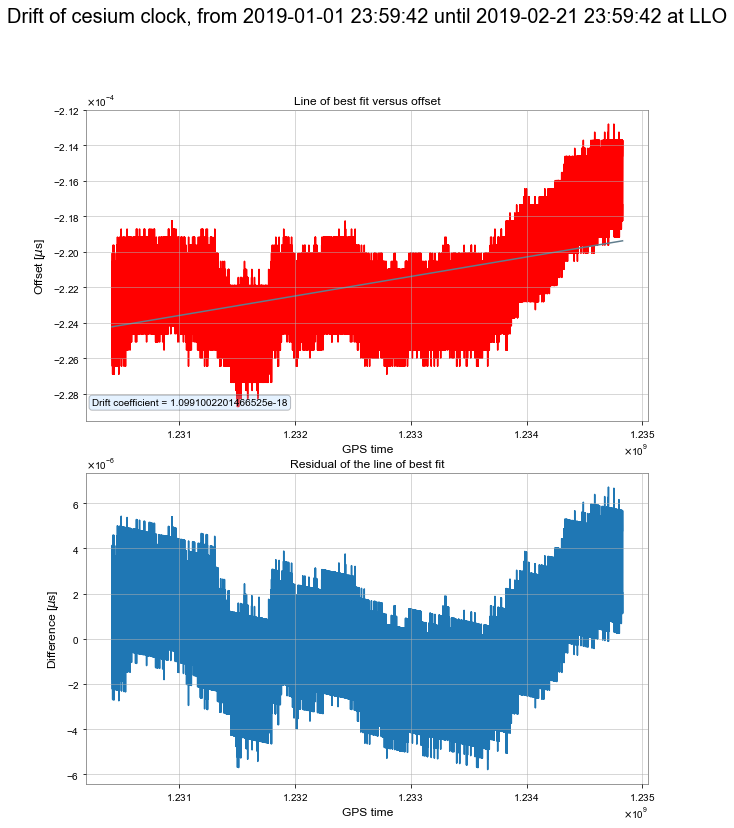

In [107]:
make_plot(start_time, end_time, final_array, "LLO")

## With one concatenated data file

If `geco_gwpy_dump.py` succeeds in concatenating the files, you can plot the data using the following.

Note: the data we use below is mean minute trend, so the length of the x-axis will be different than if we were using raw data (like we were above). 

In [69]:
file='data_lho/1217289600__1230336060__H1..SYS-TIMING_C_MA_A_PORT_2_SLAVE_CFC_TIMEDIFF_1.mean--m-trend.hdf5'
f = hp.File(file, "r") #change this line for your system
key = list(f.keys())[0]
dset = f[key].value
start_time = int(str(f)[12:22])
end_time = int(str(f)[24:34])

Severe outliers found and removed (time: value):
1217358000: 0.0
1217358060: 0.0
1217358120: 0.0
1217358180: 0.0
1217365200: 0.0
1217365260: 0.0
1217365320: 0.0
1217365380: 0.0
1217365440: 0.0
1217365500: 0.0
1217365560: 0.0
1217365620: 0.0
1217365680: 0.0
1217365740: 0.0
1217365800: 0.0
1217365860: 0.0
1217365920: 0.0
1217365980: 0.0
1217366040: 0.0
1217368800: 0.0
1217368860: 0.0
1217368920: 0.0
1217368980: 0.0
1217369040: 0.0
1217369100: 0.0
1217369160: 0.0
1217369220: 0.0
1217369280: 0.0
1217369340: 0.0
1217369400: 0.0
1217369460: 0.0
1217369520: 0.0
1217369580: 0.0
1217369640: 0.0
1217369700: 0.0
1217369760: 0.0
1217369820: 0.0
1217369880: 0.0
1217369940: 0.0
1217370000: 0.0
1217370060: 0.0
1217370120: 0.0
1217370180: 0.0
1217370240: 0.0
1217370300: 0.0
1217696400: 0.0
1217696460: 0.0
1217696520: 0.0
1217696580: 0.0
1217696640: 0.0
1217696700: 0.0
1217696760: 0.0
1217696820: 0.0
1217696880: 0.0
1217696940: 0.0
1217697000: 0.0
1217697060: 0.0
1217697120: 0.0
1217697180: 0.0
1217697

making plots
<class 'numpy.float64'>
-1.1060516440117154e-14
drift coefficient:
-1.1060516440117154e-14


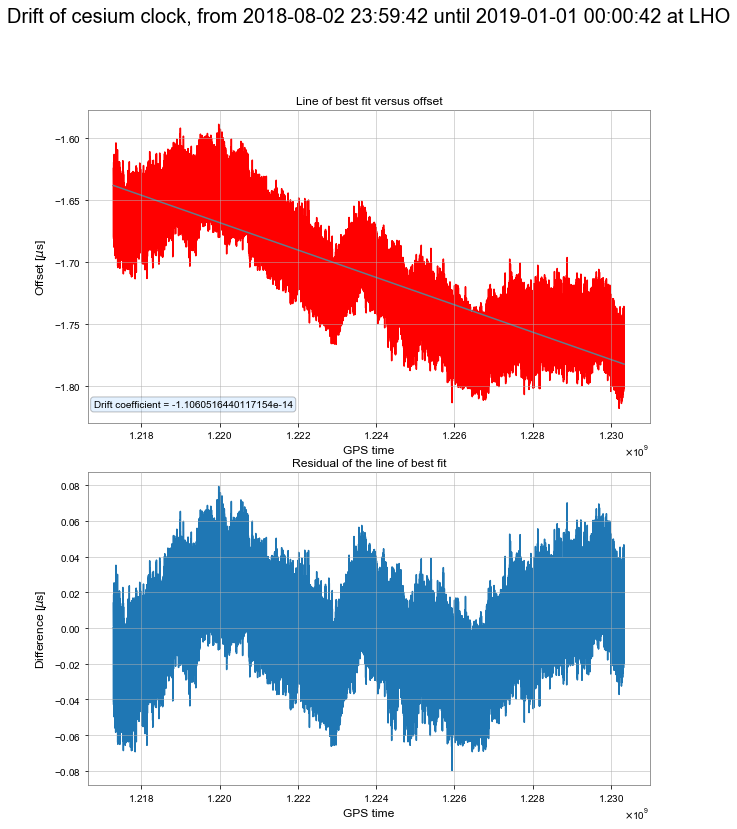

In [100]:
make_plot(start_time, end_time, dset, "LHO", trend='m-trend')